<a href="https://colab.research.google.com/github/ahsan-muzaheed/C-S-579-M02/blob/main/method1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dense
#import scipy.stats as st
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split

from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score

import torch
import torch.nn as nn
#import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [6]:
from psutil import *
cpu_count()
cpu_stats()
!cat /proc/cpuinfo
!df -h
virtual_memory()

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

svmem(total=13622194176, available=12804079616, percent=6.0, used=547241984, free=11119165440, active=966762496, inactive=1316360192, buffers=122290176, cached=1833496576, shared=1208320, slab=157143040)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(device)



cpu
cpu


In [ ]:
#from google.colab import drive
#drive.mount('/content/MyDrive/')
#4/1AX4XfWj4gZil2kGwsKoDw0jn6UuUv1lyfMwtQPErYTPJe9_uq8OKay-tj0I

Mounted at /content/MyDrive/


In [ ]:
from google.colab import files
uploaded = files.upload()

labelFile="Sampled_labels.pck"
inputsFile="Sampled_inputs.pck"




Saving Sampled_inputs.pck to Sampled_inputs.pck
Saving Sampled_labels.pck to Sampled_labels.pck


In [ ]:
#inputsFile="C:\\Users\\XXXX\\Desktop\\Sampled_inputs.pck"
#labelFile="C:\\Users\\XXXX\\Desktop\\Sampled_labels.pck"

In [ ]:
import pickle

def load(file_name):
    with open(file_name, 'rb') as fp:
        obj = pickle.load(fp)
    return obj

Sampled_inputs=load(inputsFile)
Sampled_labels=load(labelFile)
#print(Sampled_inputs.shape)
#print(Sampled_inputs[0])
#print(Sampled_inputs)
temp=Sampled_inputs[0]
#print(temp)
df = pd.DataFrame(temp)
trainData=Sampled_inputs
trainLebel=Sampled_labels
print("trainData.shape: ",trainData.shape)
print("trainLebel.shape: ",trainLebel.shape)

trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)


# New Section

In [ ]:
#four-class problem {X, M, B/C, Q}
print("np.unique(trainLebel): ",np.unique(trainLebel))

np.unique(trainLebel):  [0 1 2 3]


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,6.748178e+03,6.713245e+03,6.711747e+03,6.903974e+03,6.691366e+03,6.834958e+03,6.830348e+03,6.894217e+03,6.906079e+03,6.899095e+03,6.911806e+03,6.946807e+03,6.886819e+03,6.818411e+03,6.837526e+03,6.813760e+03,6.810947e+03,6.750174e+03,6.625715e+03,6.602456e+03,6.579279e+03,6.659341e+03,6.674436e+03,6.628940e+03,6.534272e+03,6.618673e+03,6.556498e+03,6.664788e+03,6.610833e+03,6.623904e+03,6.604637e+03,6.590455e+03,6.554577e+03,6.589029e+03,6.696230e+03,6.680610e+03,6.655977e+03,6.621583e+03,6.714415e+03,6.713855e+03,6.675050e+03,6.651842e+03,6.618690e+03,6.689582e+03,6.651957e+03,6.729801e+03,6.749667e+03,6.712981e+03,6.694946e+03,6.720925e+03,6.643833e+03,6.678435e+03,6.719481e+03,6.731164e+03,6.743633e+03,6.873948e+03,6.901911e+03,6.951264e+03,6.916165e+03,6.954711e+03
1,8.294421e+10,8.301113e+10,8.324237e+10,8.343257e+10,8.370511e+10,8.406158e+10,8.431275e+10,8.429531e+10,8.449927e+10,8.451908e+10,8.453654e+10,8.448848e+10,8.431700e+10,8.425498e+10,8.424089e+10,8.408494e+10,8.387123e+10,8.393793e+10,8.361261e+10,8.343825e+10,8.332854e+10,8.366482e+10,8.363221e+10,8.364418e+10,8.347730e+10,8.346451e+10,8.331999e+10,8.381583e+10,8.372099e+10,8.393815e+10,8.384039e+10,8.376975e+10,8.382140e+10,8.362348e+10,8.374229e+10,8.378515e+10,8.391120e+10,8.412847e+10,8.417939e+10,8.428436e+10,8.433016e+10,8.457251e+10,8.479324e+10,8.511911e+10,8.528108e+10,8.549333e+10,8.547887e+10,8.579096e+10,8.595762e+10,8.642296e+10,8.686979e+10,8.726270e+10,8.771953e+10,8.808078e+10,8.818426e+10,8.867265e+10,8.892919e+10,8.907855e+10,8.879042e+10,8.892432e+10
2,1.591225e+24,1.591180e+24,1.585508e+24,1.576556e+24,1.600757e+24,1.591036e+24,1.589851e+24,1.577024e+24,1.586829e+24,1.601676e+24,1.584634e+24,1.588865e+24,1.578638e+24,1.577545e+24,1.577035e+24,1.570983e+24,1.559647e+24,1.567801e+24,1.570021e+24,1.559968e+24,1.556961e+24,1.561306e+24,1.558285e+24,1.560219e+24,1.564493e+24,1.557323e+24,1.555459e+24,1.554123e+24,1.551750e+24,1.547466e+24,1.543670e+24,1.544275e+24,1.551716e+24,1.548201e+24,1.550484e+24,1.540382e+24,1.542652e+24,1.550473e+24,1.533120e+24,1.542590e+24,1.538034e+24,1.546075e+24,1.556837e+24,1.554712e+24,1.556176e+24,1.566051e+24,1.565630e+24,1.570802e+24,1.565608e+24,1.568783e+24,1.585399e+24,1.588082e+24,1.595610e+24,1.601331e+24,1.600107e+24,1.605313e+24,1.600205e+24,1.597570e+24,1.595188e+24,1.585478e+24
3,1.095967e+14,1.082126e+14,1.074454e+14,1.084795e+14,1.086643e+14,1.096684e+14,1.083214e+14,1.090471e+14,1.088327e+14,1.091217e+14,1.085458e+14,1.085662e+14,1.071168e+14,1.059483e+14,1.051378e+14,1.053031e+14,1.054864e+14,1.044780e+14,1.039780e+14,1.037375e+14,1.027367e+14,1.038385e+14,1.049437e+14,1.037925e+14,1.040900e+14,1.033482e+14,1.036262e+14,1.049621e+14,1.045356e+14,1.046448e+14,1.042238e+14,1.037572e+14,1.037426e+14,1.047694e+14,1.050534e+14,1.042639e+14,1.037527e+14,1.048586e+14,1.041958e+14,1.039199e+14,1.040402e+14,1.035750e+14,1.026949e+14,1.029952e+14,1.023277e+14,1.030126e+14,1.027505e+14,1.032009e+14,1.032871e+14,1.033549e+14,1.027543e+14,1.029321e+14,1.032735e+14,1.040559e+14,1.048489e+14,1.060069e+14,1.069829e+14,1.084181e+14,1.082073e+14,1.077902e+14
4,1.510191e+03,1.552900e+03,1.569594e+03,1.608219e+03,1.479273e+03,1.644488e+03,1.587280e+03,1.530972e+03,1.580642e+03,1.562139e+03,1.608232e+03,1.598538e+03,1.581501e+03,1.552158e+03,1.623889e+03,1.530519e+03,1.553298e+03,1.529500e+03,1.558477e+03,1.475699e+03,1.497390e+03,1.595699e+03,1.561801e+03,1.558677e+03,1.475048e+03,1.600107e+03,1.582988e+03,1.607632e+03,1.628840e+03,1.681735e+03,1.658377e+03,1.656195e+03,1.666965e+03,1.718904e+03,1.780951e+03,1.790150e+03,1.774533e+03,1.828370e+03,1.799467e+03,1.784416e+03,1.819143e+03,1.821234e+03,1.879973e+03,1.920438e+03,1.799937e+03,1.810811e+03,1.816423e+03,1.875490e+03,1.714993e+03,1.788926e+03,1.811564e+03,1.888606e+03,1.839960e+03,1.870738e+

In [ ]:

temptrainData=np.empty([1540,60, 33])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l]
  #print(temp)
  #temp=np.transpose(temp)
  temp=temp.T
  #print(temp.shape)
  #print(temp)
  temptrainData[l,:,:]=temp
  n=n+1
  #np.append(temptrainData, temp)
  #print(temptrainData)

#print(temptrainData.shape)
#print(trainData.shape) 
trainData=temptrainData
print("trainData.shape: ",trainData.shape)
#print(trainData[0])

temp=trainData[0]
#print(temp)
df = pd.DataFrame(temp)
#df=pd.DataFrame.from_dict(trainData)
trainData222=trainData

trainData.shape:  (1540, 60, 33)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,6748.177901,8.294421e+10,1.591225e+24,1.095967e+14,1510.190735,5.537032e+13,6.524454e+22,-1.945966e+25,13461.392092,-0.176659,34.471059,39.453077,45.819783,100.149411,114.386985,61.674219,-0.016967,-4.381126e+24,0.003869,-0.030947,-1.004464e+25,0.039773,0.091188,5.414326,5.392323,5.336158,5.205328,0.0,0.0,0.000000,0.000000,1424.0,0.000004
1,6713.245495,8.301113e+10,1.591180e+24,1.082126e+14,1552.899870,5.163912e+13,6.552311e+22,-1.967367e+25,13459.043822,-0.178458,34.331225,39.374540,45.662476,99.936510,113.619660,61.322745,-0.017445,-4.383287e+24,0.011711,-0.031749,-1.012427e+25,0.039760,0.091836,5.405846,5.403088,5.335880,5.211822,0.0,0.0,0.000000,0.000000,1400.0,0.000007
2,6711.746592,8.324237e+10,1.585508e+24,1.074454e+14,1569.593570,5.208053e+13,6.582194e+22,-2.022283e+25,13391.359484,-0.182930,33.988020,39.143588,45.448974,99.023375,112.719317,60.675807,-0.017606,-4.420609e+24,0.007235,-0.031880,-1.017996e+25,0.039988,0.092085,5.405772,5.398195,5.345981,5.216945,0.0,0.0,0.000000,0.000039,1405.0,0.000003
3,6903.974288,8.343257e+10,1.576556e+24,1.084795e+14,1608.218901,5.166028e+13,6.609184e+22,-2.072753e+25,13248.436229,-0.187068,33.953462,39.108574,45.406818,99.049681,113.229972,60.932139,-0.017949,-4.415880e+24,-0.025166,-0.032477,-1.008520e+25,0.039854,0.091020,5.396873,5.398732,5.327560,5.203755,0.0,0.0,0.000000,0.000000,1429.0,0.000003
4,6691.365852,8.370511e+10,1.600757e+24,1.086643e+14,1479.272564,5.030951e+13,6.614713e+22,-1.999304e+25,13367.513454,-0.179852,34.306310,39.324444,45.578788,98.727637,112.209417,60.784185,-0.016406,-4.419732e+24,-0.003252,-0.029958,-1.013794e+25,0.039759,0.091198,5.426061,5.389834,5.351214,5.217820,0.0,0.0,0.000000,0.000000,1430.0,0.000003
5,6834.958217,8.406158e+10,1.591036e+24,1.096684e+14,1644.488148,5.663543e+13,6.630166e+22,-2.075205e+25,13298.131406,-0.185888,34.483294,39.364694,45.696117,98.602980,112.785305,60.824772,-0.018254,-4.460377e+24,-0.045736,-0.032993,-1.014526e+25,0.039954,0.090877,5.421926,5.407266,5.350388,5.219855,0.0,0.0,0.000000,0.000000,1517.0,0.000004
6,6830.348029,8.431275e+10,1.589851e+24,1.083214e+14,1587.280389,5.648788e+13,6.649235e+22,-2.105215e+25,13390.341243,-0.188014,33.861280,39.050645,45.394783,98.753115,113.077813,60.600057,-0.017754,-4.441479e+24,-0.083556,-0.031693,-1.019122e+25,0.039666,0.091017,5.419279,5.413495,5.353073,5.232006,0.0,0.0,0.000039,0.000000,1477.0,0.000004
7,6894.216660,8.429531e+10,1.577024e+24,1.090471e+14,1530.971594,5.153441e+13,6.685179e+22,-2.175302e+25,13251.479423,-0.194314,33.643191,38.930775,45.108107,99.110838,113.584001,60.789651,-0.017085,-4.376187e+24,-0.028262,-0.030414,-1.001832e+25,0.039091,0.089491,5.413199,5.418618,5.341884,5.221831,0.0,0.0,0.000000,0.000000,1599.0,0.000015
8,6906.079329,8.449927e+10,1.586829e+24,1.088327e+14,1580.642155,5.204076e+13,6.646028e+22,-2.155312e+25,13485.254521,-0.192063,33.955194,39.159771,45.353562,99.208032,113.520309,60.973833,-0.017839,-4.374637e+24,-0.070905,-0.031384,-1.007602e+25,0.038983,0.089789,5.419249,5.426273,5.354147,5.243087,0.0,0.0,0.000000,0.000000,1585.0,0.000008
9,6899.094797,8.451908e+10,1.601676e+24,1.091217e+14,1562.139216,5.105149e+13,6.593766e+22,-2.084657e+25,13729.350076,-0.185724,34.335868,39.419687,45.548152,99.181880,113.483863,61.674972,-0.017783,-4.178514e+24,-0.088317,-0.031175,-1.025307e+25,0.037227,0.091345,5.427837,5.393532,5.321879,5.221579,0.0,0.0,0.000000,0.000000,1726.0,0.000005


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(trainData.shape)

print(type(trainData))
npArrays=[]
for l in range(0, len(trainData)):
  trainData_std = sc.fit_transform(trainData[l])
  #trainData_std = trainData_std.astype(np.float64)
  #print(type(trainData_std[0][0]))
  npArrays.append(trainData_std)


print(type(npArrays))
arr = np.asarray(npArrays)
print(type(arr))
trainData=arr
df = pd.DataFrame(trainData[0])

#print(npArrays.shape)

(1540, 60, 33)
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,0.170039,-1.106903,1.095926,2.008176,-1.297762,-0.440735,-0.923848,2.058978,-0.398554,2.328837,1.105849,1.809863,2.035207,0.879342,0.802998,0.916175,1.679189,-1.727893,2.412080,1.067677,1.252416,1.933735,-0.719761,-0.453382,-1.558962,0.698500,-1.310782,0.0,0.0,-0.130189,-0.185695,-1.963846,-0.235165
1,-0.134380,-1.067574,1.093629,1.368075,-0.994279,-1.009838,-0.778206,1.927245,-0.405734,2.165226,0.846400,1.570236,1.586302,0.755758,0.335336,0.588758,1.356224,-1.735224,2.553444,0.680336,0.949852,1.929259,-0.200313,-1.147509,-1.226720,0.683677,-0.838679,0.0,0.0,-0.130189,-0.185695,-2.031969,0.831517
2,-0.147442,-0.931664,0.804217,1.013329,-0.875657,-0.942513,-0.621968,1.589206,-0.612682,1.758495,0.209612,0.865570,0.977036,0.225706,-0.213397,-0.013899,1.247128,-1.861861,2.472757,0.616981,0.738294,2.010831,-0.001295,-1.153556,-1.377737,1.221237,-0.466231,0.0,0.0,-0.130189,5.385165,-2.017777,-0.513848
3,1.527730,-0.819873,0.347499,1.491505,-0.601193,-1.006611,-0.480861,1.278538,-1.049679,1.382135,0.145493,0.758738,0.856735,0.240976,0.097832,0.224889,1.015681,-1.845817,1.888701,0.328145,1.098308,1.962772,-0.853982,-1.882032,-1.361176,0.240892,-1.425154,0.0,0.0,-0.130189,-0.185695,-1.949653,-0.449730
4,-0.325051,-0.659689,1.582254,1.576978,-1.517461,-1.212638,-0.451949,1.730654,-0.685593,2.038493,0.800172,1.417387,1.347483,0.054038,-0.524166,0.087062,2.058325,-1.858887,2.283721,1.546049,0.897940,1.928613,-0.711457,0.507198,-1.635764,1.499758,-0.402619,0.0,0.0,-0.130189,-0.185695,-1.946815,-0.465198
5,0.926288,-0.450171,1.086256,2.041337,-0.343471,-0.247772,-0.371157,1.263440,-0.897733,1.489474,1.128552,1.540193,1.682304,-0.018322,-0.173179,0.124870,0.809029,-1.996800,1.517920,0.078615,0.870118,1.998810,-0.968544,0.168737,-1.097797,1.455798,-0.254664,0.0,0.0,-0.130189,-0.185695,-1.699868,-0.232977
6,0.886113,-0.302548,1.025820,1.418397,-0.749978,-0.270277,-0.271461,1.078717,-0.615796,1.296077,-0.025544,0.581991,0.822391,0.068827,0.005096,-0.084463,1.146964,-1.932676,0.836181,0.707037,0.695501,1.895460,-0.856673,-0.047920,-0.905547,1.598725,0.628653,0.0,0.0,7.681146,-0.185695,-1.813407,-0.057889
7,1.442697,-0.312802,0.371367,1.753992,-1.150098,-1.025809,-0.083541,0.647292,-1.040374,0.723098,-0.430190,0.216251,0.004309,0.276476,0.313603,0.092154,1.599495,-1.711132,1.832898,1.325513,1.352414,1.688971,-2.078030,-0.545663,-0.747462,1.003200,-0.111008,0.0,0.0,-0.130189,-0.185695,-1.467113,3.174800
8,1.546075,-0.192925,0.871620,1.654863,-0.797148,-0.948579,-0.288228,0.770338,-0.325593,0.927778,0.148706,0.914948,0.704758,0.332895,0.274784,0.263728,1.089530,-1.705874,1.064214,0.856491,1.133174,1.650126,-1.839309,-0.050425,-0.511202,1.655843,1.434208,0.0,0.0,-0.130189,-0.185695,-1.506851,0.983283
9,1.485208,-0.181282,1.629153,1.788511,-0.928626,-1.099467,-0.561468,1.205258,0.420743,1.504398,0.855014,1.707986,1.260057,0.317714,0.252571,0.916877,1.127438,-1.040409,0.750358,0.957498,0.460522,1.019403,-0.593422,0.652584,-1.521662,-0.061449,-0.129333,0.0,0.0,-0.130189,-0.185695,-1.106627,0.022745


In [ ]:
INPUT_DIM = 33
HIDDEN_DIM = 64
NUM_TS = 60
NUM_CLASSES = 4
#NUM_CLASSES = 1
num_layers = 1 #number of stacked lstm layers
hidden_size=HIDDEN_DIM

In [ ]:
#input_dim = 33, hidden_dim = 128, num_TS = 60, num_classes = 4
class LSTM_MVTS_LRN(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_classes):
    super(LSTM_MVTS_LRN, self).__init__()
    self.hidden_dim = hidden_dim
    # bidirectional=True---------------->
    self.lstm = nn.LSTM(input_dim, hidden_dim)
    #self.lstm = nn.RNN(input_dim, hidden_dim)
    self.hidden2class = nn.Linear(hidden_dim, num_classes)
  def forward(self, mvts):
    #print(mvts.shape)
    #input single mvts (60, 33); output class probability vector (1,4)
    #https://stackoverflow.com/questions/42479902/how-does-the-view-method-work-in-pytorch
    lstm_out, _ = self.lstm(mvts.view(len(mvts), 1, -1)) #mvts.shape: (60, 33); len(mvts)=60; new shape: (60, 1, 33); lstm_out --> (60, 128)
    #lstm_out, _ = self.lstm(mvts)
    last_lstm_out = lstm_out[len(lstm_out)-1] #(1,128)
    class_space = self.hidden2class(last_lstm_out) #(1,4)
    class_scores = F.log_softmax(class_space, dim=1)
    return class_scores,lstm_out,last_lstm_out


In [ ]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [ ]:
def doClassSpecificCalulcation(Accuracy,trainLebel,classification_report_dict):
  print('\np.mean(Accuracy) :',np.mean(Accuracy))
  print('\np.std(Accuracy) :',np.std(Accuracy))
  print('\n33333333 p.mean np.std(Accuracy) :     ',np.round(np.mean(Accuracy),2),"+-",np.round(np.std(Accuracy),2) )
  for j in range( len(np.unique(trainLebel)) ):
    print('\n\n\n\nclass :',j) 
    precision=[]
    recall=[]
    f1_score=[]
    for i in range(len(classification_report_dict)):
      report=classification_report_dict[i]
      #print('classification_report : \n',report) 
      temp=report[str(j)]['precision'] 
      precision.append(temp)

      temp=report[str(j)]['recall'] 
      recall.append(temp)

      temp=report[str(j)]['f1-score'] 
      f1_score.append(temp)

    print('\np.mean(precision) \t p.mean(recall) \t p.mean(f1_score) :') 


    print(np.mean(precision)) 
    print(np.mean(recall)) 
    print(np.mean(f1_score))

    print('\np.mean p.std(precision) \tp.mean  p.std(recall) \tp.mean  p.std(f1_score) :')

    print(np.round(np.mean(precision),2),"+-",np.round(np.std(precision),2) )
    print(np.round(np.mean(recall),2),"+-",np.round(np.std(recall),2) )
    print(np.round(np.mean(f1_score),2),"+-",np.round(np.std(f1_score),2) )

In [ ]:
def startCalulations():

  #test_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  test_sizes=[0.3]
  
  for temp4 in range(len(test_sizes)):
    test_size=test_sizes[temp4]
    print("\n\n\n *************** test_size: ",test_size)
    random_state=0#random.randint(42, 100)
    print("random_state: ",random_state)
    
    X_train, X_test, y_train, y_test = train_test_split(trainData, trainLebel, test_size=test_size, random_state=random_state,shuffle = False)
    #print("X_train.shape: ",X_train.shape)
    #print("X_test.shape: ",X_test.shape)
    #print("y_train.shape: ",y_train.shape)
    #print("y_test.shape: ",y_test.shape)
    #print(type(X_train))



    print("X_train.shape X_test.shape y_train.shape y_test.shape ",
              X_train.shape, X_test.shape ,y_train.shape, y_test.shape)
    
    HIDDEN_DIMs=[32,64,96,128,160,192,224,256,512]
    HIDDEN_DIMs=[33]
    for temp5 in range(len(HIDDEN_DIMs)): 
        hds=HIDDEN_DIMs[temp5]
        doLstmBasedCalculations( X_train, X_test, y_train, y_test,hds)

In [ ]:

import random
import matplotlib.pyplot as plt

def doLstmBasedCalculations( X_train, X_test, y_train, y_test,hds):
    HIDDEN_DIM=hds
    num_masterIteration=1

    #print("X_train.shape: ",X_train.shape)
    #print("X_test.shape: ",X_test.shape)
    #print("y_train.shape: ",y_train.shape)
    #print("y_test.shape: ",y_test.shape)
    #print(type(X_train))

    classification_report_dict=[]
    Accuracy=[]
    for masterIteration in range(num_masterIteration):
        print("\nmasterIteration HIDDEN_DIM : ",masterIteration, HIDDEN_DIM)
        #print(bcolors.WARNING + "\nmasterIteration :" + bcolors.WARNING,masterIteration)
        #random_state=random.randint(42, 100)
        #print("random_state: ",random_state)


        model = LSTM_MVTS_LRN(INPUT_DIM, 
                              #hds,
                              HIDDEN_DIM, 
                              NUM_CLASSES)
        #loss_function = nn.NLLLoss()
        #optimizer = optim.SGD(model.parameters(), lr=0.01)

        loss_function = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01) 

        numTrain = X_train.shape[0]

        numEpochs =500
        numEpochs =1

        #train
        for epoch in range(numEpochs):
          print("\n nmasterIteration, epoch: ",masterIteration,epoch)


          numTrain=3
          for i in range(numTrain):
            model.zero_grad()
            mvts = X_train[i,:,:]
            print("mvts no:",i)
            print("input mvts.shape: ",mvts.shape)
            mvts = torch.from_numpy(mvts).float()


            target = y_train[i]
            #print(type(target))
            target = [target]
            #print(type(target))
            target=np.array(target)
            #print(type(target))
            target = torch.Tensor(target)
            #print(type(target))

            target = target.type(torch.LongTensor)

            #print(type(mvts))
            #print(mvts.is_cuda)
            mvts = mvts.to(device)
            #print(mvts.is_cuda)

            #print(type(target))
            #print(target.is_cuda)
            target = target.to(device)
            #print(target.is_cuda)

            #target = torch.from_numpy(np.array(target))
            mvts = mvts.view(mvts.size(0), -1)

            model.to(device)
           
            #input mvts.shape:  torch.Size([60, 33])
            #print(type(mvts))
            #print(mvts)
            print("------- >")
            print("------- >")
            loss_values = []
            losses = []
            epoch = []
            running_loss = 0.0
            endingTarinIndex=56
            for rowIndex in range(endingTarinIndex):
              
              row=mvts[rowIndex]
              #print("row.shape before resize: ",row.shape)
              row.resize_(1, 33)
              #print(type(mvts2))
              #print("rowIndex: ",rowIndex,"  input row.shape: ",row.shape)
             
              #print(mvts2)

              #class_scores,output,last_lstm_out = model(mvts)
              class_scores,output,last_lstm_out = model(row)

              #print(type(last_lstm_out))
              #print("last_lstm_out.shape: ",last_lstm_out.shape)
              
              #print(type(output))
              #print("output.shape: ",output.shape)
              #print(output)

              output111=output[-1,:, :]
              nextrow=mvts[rowIndex+1]
              nextrow.resize_(1, 33)
              #print("output111: ",output111.shape,"  nextrow row.shape: ",nextrow.shape)
              loss = loss_function(output111, nextrow)
              losses.append(loss)
              #print("loss: ",loss)
              #print("loss.item(): ",loss.item())
              loss.backward(retain_graph=True)
              optimizer.step()
              running_loss += loss.item()

              #loss_values.append(running_loss)
              #loss_values.append(running_loss / len(X_train))
              epoch.append(rowIndex)
             
              print("rowIndex: ",rowIndex," loss: ",loss, " running_loss: ",running_loss )
              

            ##print("------- >")
            ##print("------- >")
            import matplotlib.pyplot as plt
            print(epoch)
            print(losses)
            plt.plot(epoch, losses, label = 'Training error')
            plt.xlabel("epoch")
            plt.ylabel("losses")
            plt.show()

            #torch.autograd.set_detect_anomaly(True)
            losses=[]
            test_no=[]
            k=0
            for predictedrowIndex in range(endingTarinIndex, 60):
              print("predictedrowIndex: ",predictedrowIndex)
              
               #class_scores,output,last_lstm_out = model(mvts)
               #https://stackoverflow.com/questions/48302810/whats-the-difference-between-hidden-and-output-in-pytorch-lstm
              #print("output2222 .shape: ",output.shape) 
              
              #class_scores,output,last_lstm_out = model(output)
              class_scores,output,last_lstm_out = model(output)
              #print(type(last_lstm_out))
              #print("last_lstm_out2222.shape: ",last_lstm_out.shape)
              #print("output222.shape: ",output.shape) 
              
              #print(type(output))
              
              #print(output)

              output333=output[-1,:, :]
              #print("output333.shape: ",output333.shape)         
              #print(output333)

              target222=mvts[predictedrowIndex]
              ##print("target.shape before resize: ",target.shape)
              target222.resize_(1, 33)
              #print("actual target222.shape: ",target222.shape)
              ##print("class_scores.shape: ",class_scores.shape)
              ##print("class_scores: ",class_scores)
             #Expected input batch_size (1) to match target batch_size (33).
              ##print("output.shape: ",output.shape)



              #print("111111111 ")

              #loss = loss_function(class_scores, target)
              #loss = loss_function(last_lstm_out, target)
              loss = loss_function(output333, target222)
              
              target222 = target222.detach().numpy()
              output333 = output333.detach().numpy()

              keras_mse = tf.keras.losses.mean_squared_error(target222, output333)
              sklearn_mse = mean_squared_error(target222, output333, squared=True)

              losses.append(sklearn_mse)
              k=k+1
              test_no.append(k)
              print("loss: ",loss ,"keras_mse: ", keras_mse,"sklearn_mse: ", sklearn_mse)

            import matplotlib.pyplot as plt
            print(test_no)
            print(losses)
            plt.plot(test_no, losses, label = 'Test error')
            plt.xlabel("test_no")
            plt.ylabel("losses")
            plt.show()

              


              #print("22222222 ")
              
              #loss = criterion_label(outputs, labels)
              #print(loss)
              #print("output333.shape: ",output333.shape) 
              #loss.backward()
              #loss.backward(retain_graph=True)
              #optimizer.step()
              #running_loss += loss.item()

              #loss_values.append(running_loss)
              #loss_values.append(running_loss / len(X_train))

              
              #print(rms)
             

              #You can't call .numpy() on a tensor if that tensor is part of the computation graph. 
              #You first have to detach it from the graph and this will return a new tensor that shares the same underlying storage
              #but doesn't track gradients (requires_grad is False). Then you can call .numpy() safely. 
              #So just replace tensor.numpy() with tensor.detach().numpy().







 *************** test_size:  0.3
random_state:  0
X_train.shape X_test.shape y_train.shape y_test.shape  (1078, 60, 33) (462, 60, 33) (1078,) (462,)

masterIteration HIDDEN_DIM :  0 33

 nmasterIteration, epoch:  0 0
mvts no: 0
input mvts.shape:  (60, 33)
------- >
------- >
rowIndex:  0  loss:  tensor(1.4176, grad_fn=<MseLossBackward0>)  running_loss:  1.41764497756958
rowIndex:  1  loss:  tensor(1.8984, grad_fn=<MseLossBackward0>)  running_loss:  3.31608247756958
rowIndex:  2  loss:  tensor(0.9799, grad_fn=<MseLossBackward0>)  running_loss:  4.295991599559784
rowIndex:  3  loss:  tensor(1.2310, grad_fn=<MseLossBackward0>)  running_loss:  5.5270028710365295
rowIndex:  4  loss:  tensor(0.7736, grad_fn=<MseLossBackward0>)  running_loss:  6.300569295883179
rowIndex:  5  loss:  tensor(2.3632, grad_fn=<MseLossBackward0>)  running_loss:  8.663791179656982
rowIndex:  6  loss:  tensor(1.0613, grad_fn=<MseLossBackward0>)  running_loss:  9.725068211555481
rowIndex:  7  loss:  tensor(0.6778, 

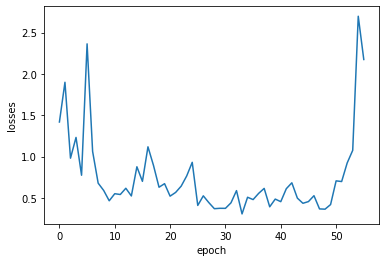

predictedrowIndex:  56
loss:  tensor(2.1474, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([2.147409], shape=(1,), dtype=float32) sklearn_mse:  2.147409
predictedrowIndex:  57
loss:  tensor(2.7321, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([2.7321002], shape=(1,), dtype=float32) sklearn_mse:  2.7321002
predictedrowIndex:  58
loss:  tensor(2.5847, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([2.5846703], shape=(1,), dtype=float32) sklearn_mse:  2.5846703
predictedrowIndex:  59
loss:  tensor(3.6916, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([3.6915991], shape=(1,), dtype=float32) sklearn_mse:  3.691599
[1, 2, 3, 4]
[2.147409, 2.7321002, 2.5846703, 3.691599]


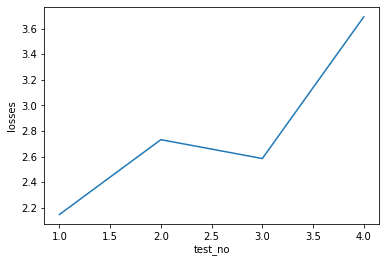

mvts no: 1
input mvts.shape:  (60, 33)
------- >
------- >
rowIndex:  0  loss:  tensor(0.7877, grad_fn=<MseLossBackward0>)  running_loss:  0.787690281867981
rowIndex:  1  loss:  tensor(1.2590, grad_fn=<MseLossBackward0>)  running_loss:  2.0467053651809692
rowIndex:  2  loss:  tensor(0.9804, grad_fn=<MseLossBackward0>)  running_loss:  3.027081549167633
rowIndex:  3  loss:  tensor(0.9239, grad_fn=<MseLossBackward0>)  running_loss:  3.9509865045547485
rowIndex:  4  loss:  tensor(1.0511, grad_fn=<MseLossBackward0>)  running_loss:  5.002052068710327
rowIndex:  5  loss:  tensor(0.8209, grad_fn=<MseLossBackward0>)  running_loss:  5.822976529598236
rowIndex:  6  loss:  tensor(1.4181, grad_fn=<MseLossBackward0>)  running_loss:  7.241087377071381
rowIndex:  7  loss:  tensor(1.0558, grad_fn=<MseLossBackward0>)  running_loss:  8.296898782253265
rowIndex:  8  loss:  tensor(1.3502, grad_fn=<MseLossBackward0>)  running_loss:  9.64708036184311
rowIndex:  9  loss:  tensor(1.1150, grad_fn=<MseLossBackwa

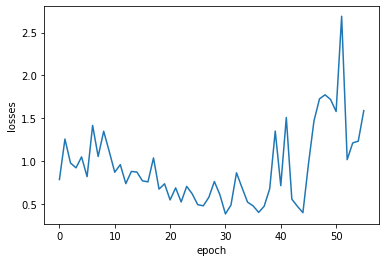

predictedrowIndex:  56
loss:  tensor(1.6087, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.6087344], shape=(1,), dtype=float32) sklearn_mse:  1.6087344
predictedrowIndex:  57
loss:  tensor(1.7381, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.7381271], shape=(1,), dtype=float32) sklearn_mse:  1.738127
predictedrowIndex:  58
loss:  tensor(1.8067, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.8067062], shape=(1,), dtype=float32) sklearn_mse:  1.8067063
predictedrowIndex:  59
loss:  tensor(1.9913, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.9913108], shape=(1,), dtype=float32) sklearn_mse:  1.9913108
[1, 2, 3, 4]
[1.6087344, 1.738127, 1.8067063, 1.9913108]


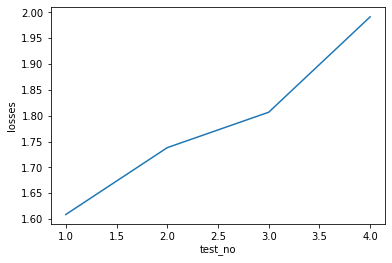

mvts no: 2
input mvts.shape:  (60, 33)
------- >
------- >
rowIndex:  0  loss:  tensor(1.0191, grad_fn=<MseLossBackward0>)  running_loss:  1.0190712213516235
rowIndex:  1  loss:  tensor(1.3135, grad_fn=<MseLossBackward0>)  running_loss:  2.3325916528701782
rowIndex:  2  loss:  tensor(1.1256, grad_fn=<MseLossBackward0>)  running_loss:  3.458232879638672
rowIndex:  3  loss:  tensor(0.9038, grad_fn=<MseLossBackward0>)  running_loss:  4.362032532691956
rowIndex:  4  loss:  tensor(0.7094, grad_fn=<MseLossBackward0>)  running_loss:  5.071419954299927
rowIndex:  5  loss:  tensor(1.0778, grad_fn=<MseLossBackward0>)  running_loss:  6.149251818656921
rowIndex:  6  loss:  tensor(0.8224, grad_fn=<MseLossBackward0>)  running_loss:  6.971608102321625
rowIndex:  7  loss:  tensor(0.6539, grad_fn=<MseLossBackward0>)  running_loss:  7.625539422035217
rowIndex:  8  loss:  tensor(0.8518, grad_fn=<MseLossBackward0>)  running_loss:  8.47737717628479
rowIndex:  9  loss:  tensor(0.8269, grad_fn=<MseLossBackwa

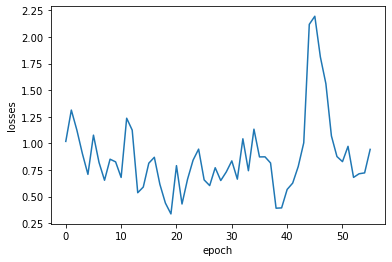

predictedrowIndex:  56
loss:  tensor(1.0261, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.0261252], shape=(1,), dtype=float32) sklearn_mse:  1.0261252
predictedrowIndex:  57
loss:  tensor(1.3492, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.349174], shape=(1,), dtype=float32) sklearn_mse:  1.3491741
predictedrowIndex:  58
loss:  tensor(1.5339, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([1.5339009], shape=(1,), dtype=float32) sklearn_mse:  1.5339011
predictedrowIndex:  59
loss:  tensor(2.0759, grad_fn=<MseLossBackward0>) keras_mse:  tf.Tensor([2.07595], shape=(1,), dtype=float32) sklearn_mse:  2.07595
[1, 2, 3, 4]
[1.0261252, 1.3491741, 1.5339011, 2.07595]


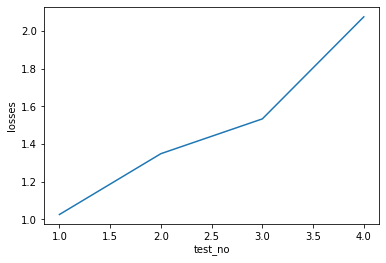

In [ ]:
startCalulations()